# COGS 108 - Final Project 

# Overview

In this project, I sought to see if human factors like the employees and the customers of the restaurant affected the health inspection score of the restaurant. If the people in the establishment isn't happy, then there will be more of a risk and opportunity for health violation and less care on safety and cleanliness. However, based on my results, there is no correlation between what the customer thinks of the restaurant and the health inspection score of the restaurant. 

# Name & PID

- Name: Michael Lee
- Github Username: micheal1029

# Research Question

Is there a relationship between job satisfaction of the employee or the customer of the restaurant and the grade of the health inspection?

## Background and Prior Work

Background: Many of the health inspections are carried out unannounced, but hard to measure since there are no federal law forcing restaurants to follow certain rules, but set of voluntary actions they can take to make sure the restaurant is clean and safe. Few things health inspectors look for during an inspection is worker hygiene, food storage and temperature practices, cross contamination, equipment and dish cleanliness, and many more. It is also difficult to measure the true risk since not all restaurants handle same kind of food. For example, sushi restaurant has higher health risk than sandwich shop. 

Prior Work: A study done by Jones, T.F et al. studied the uniformity of health inspections that should accurately incdicate the risk of food borne illness. It is found that over 7 years of health inspections in Tennessee, the health inspection "scores varied substantially over time, by region, and by person performing the inspection," and inspection system is flawed.

References (include links):
- 1) https://recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections5.htm
- 2) https://wwwnc.cdc.gov/eid/article/10/4/03-0343_article

# Hypothesis


If the employees of the restaurants or the customers are not satisfied or happy with their restaurant, then there will be a higher chance for restaurant to do poorly on health inspections. Employee satisfaction may be a factor in restaurant's health quality because if the employees aren't happy, then they will be less motivated to make sure the restaurant is clean and safe. and customers may be careless about the restaurant's sanitation, and purposely make a mess. 

# Dataset(s)

*Fill in your dataset information here*

- Dataset Name: inspections
- Link to the dataset: inspections.csv
- Number of observations: 18466

This dataset includes the id, inspection date, restaurant's information, and the inspection results which can be used to determine how each restaurant did in their inspection

- Dataset Name: yelp
- Link to the dataset: yelp.csv
- Number of observations: 3324

This dataset includes the address, rating, and the opening status of the restaurant from a popular food critic app "Yelp"

In order to combine the datasets based on the customer reviews, I will match the reviews based on address on the dataset "Yelp" with address on inspections. This way, I have the inspection data of the restaurants on the yelp dataset.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set()
sns.set_context('talk')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
ins = pd.read_csv('inspections.csv')
res = pd.read_csv('restaurants.csv')
yelp = pd.read_csv('yelp.csv')

# Data Cleaning

I first used standardize method where it takes a string and converts it into a lowercase with no whitespace in between words. This allowed me to standardize names in yelp and restaurants data. Then I pulled out important columns from restaurants and yelp data, which was name, hsisid, and rating. I dropped any ratings on the yelp dataset with less than 3 review counts because I thought small review counts could lead to bias and unaccurate results. I created a new dataframe with only those columns, and used a merge function to put the two dataframes together. I then searched for null values in any of the columns and dropped them. After that, I standardized the name of the restaurants in the inspections dataset, and created a new dataset with only the columns I needed, which was hsisid, name, score, num_critical, and num_non_critical. I then merged the new inspections dataset with dataset I created from merging restaurants and yelp dataset. I also dropped the extra name of name_y created from the merging process, and any null values in any of the significant columns. With this data cleaning, I was left with unique hsisid for each store, which allowed me to distinguish each store even with same names. I also had data for scores of health inspection, number of violations, and ratings customer gave to the restaurant. 

In [3]:
# here, I created a simple method to convert the names into a string with all lowercase and with no spaces
def standardize(string):
    string = string.lower()
    string = string.strip()
    return string
res['name'] = res['name'].apply(standardize)
yelp['name'] = yelp['name'].apply(standardize)

yelp = yelp[yelp['review_count'] > 3]
# I created two dataframes with specific columns that I want in order to merge them together
res2 = res[['hsisid','name']]
yelp2 = yelp[['name','rating']]

df = pd.merge(yelp2,res2,on='name',how='outer')
# I dropped all NaN values in hsisid and ratings column
df.dropna(subset=['hsisid','rating'],inplace=True)
df.head()

,name,rating,hsisid
12,bojangles,3.5,4.092016e+09
13,bojangles,3.5,4.092014e+09
14,bojangles,3.5,4.092013e+09
15,bojangles,3.5,4.092011e+09
16,bojangles,3.5,4.092011e+09


In [4]:
ins['name'] = ins['name'].apply(standardize)
ins2 = ins[['hsisid','name','score','num_critical','num_non_critical']]
df2 = pd.merge(df,ins2,on='hsisid',how='outer')
df2.dropna(subset=['rating','hsisid','name_x'],inplace=True)
df2 = df2[['name_x','rating','hsisid','score','num_critical','num_non_critical']]
df2.head()

,name_x,rating,hsisid,score,num_critical,num_non_critical
0,bojangles,3.5,4.092016e+09,100.0,2.0,1.0
1,bojangles,3.5,4.092016e+09,99.0,1.0,5.0
2,bojangles,3.5,4.092016e+09,99.5,1.0,2.0
3,bojangles,3.5,4.092016e+09,97.5,1.0,2.0
4,bojangles,3.5,4.092016e+09,97.5,1.0,2.0


In [5]:
list(df2['rating'])

[3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0

# Data Analysis & Results

My distribution for rating took a normal distribution with a slight skew to the right. Distribution for score was very skewed to the right as most data leaned on the high side of the graph. The distribution for critical and non-critical violations were skewed to the left. There weren't really any outliers as most data clustered around each other, and most data not in clusters were scattered evenly. there were very little relation ship between rating and any other variables, but there were visible relationships between score, num_critical, and num_non_critical. There seemed to be negative correlation betwen score and the other two variable as higher the score was, the less number of critical and non-critical violation was observed. 

I used a regression approach as I tried to see if there was any regressional correlation betwen rating and score. From the graphs, there were no visible correlation between rating and score. rating is not a good indication of what the restaurant will receive in their health inspection.

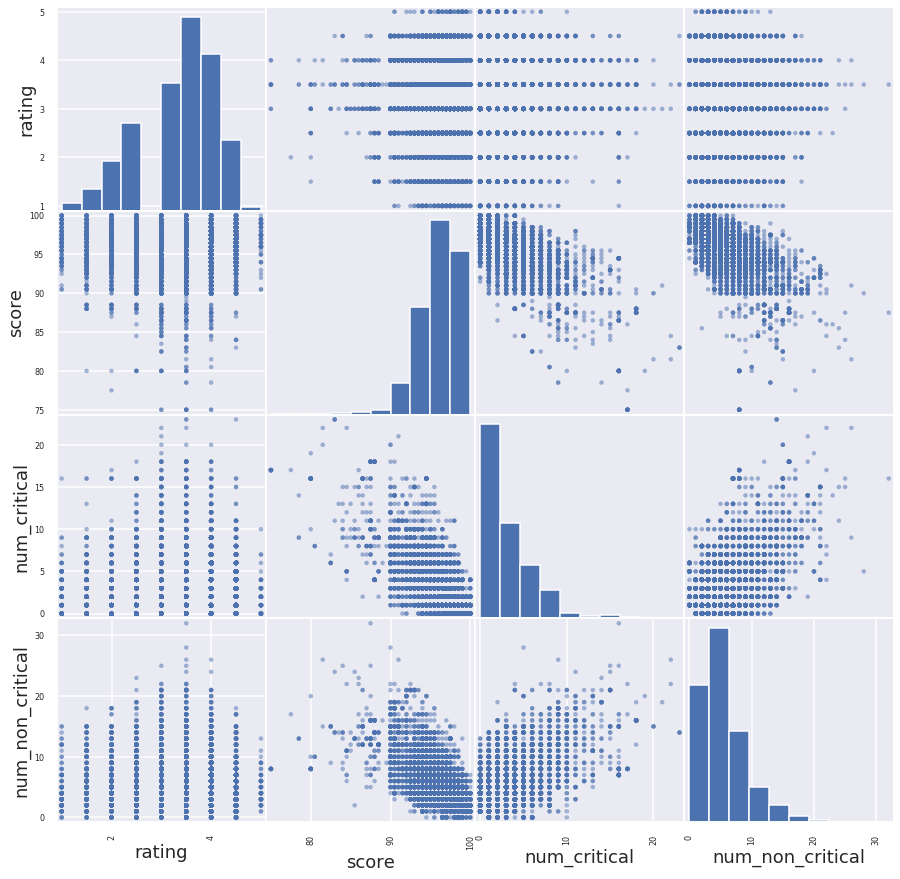

In [6]:
scatter_matrix(df2[['rating','score','num_critical','num_non_critical']],figsize = [15,15])
f1 = plt.gcf()

In this figure, we see the scatter matrix of the four variable in our dataset. The bar graphs indicate the histogram of each variable by themselves and other plots indicate the relationship between two variables. For any plots including rating, there is a sideways normal distribution, indicating that there is no relationship between the other variable. Other plots show some relationship, but is very hard to see with large clumps in either first half or the last half of the dataset.

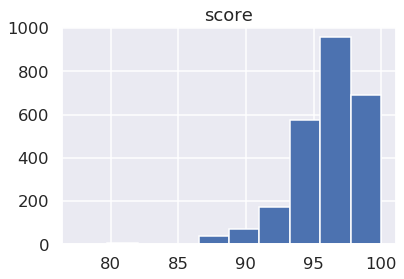

In [7]:
df2.loc[df2['rating']<3].hist(column = 'score')
f2 = plt.gcf()

This graph shows the score of ratings less than 3. According to my hypothesis, if there is a low customer satisfaction, there would be lower score, but the graph tells otherwise. This graph shows a strongly skewed to the right graph that indicates high score amonst the dataset

In [9]:
outcome, predictors = patsy.dmatrices('score ~ rating + num_critical', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     4254.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:08:58   Log-Likelihood:                -23048.
No. Observations:               10843   AIC:                         4.610e+04
Df Residuals:                   10840   BIC:                         4.612e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.3681      0.085   1148.207   

* Holding num_critical constant, for every 1 unit increase in rating, you expect to see a .1054 increase in score
* Holding rating constant, for every 1 unit increase in num_critical, you expect to see a .6114 decrease in score

# Ethics & Privacy

There are some ethics and privacy issues that may come up during collecting the data
 
* First is getting permission from the city officials to use the data of health inspections
* Second is the employee satisfaction rating since this may get them in trouble if it isn't handled carfully, and some may prefer not to participate. 
* Third is surveilance of employees to see what they are doing to make restaurants clean and safe

Employee surveys must be done anonymously and in the restaurant since we want to record their emotions while in the restaurant. This record will be an average score, so not all employee participation is necessary. The use of surveilance videos of employee's working hours may be questioned when used by someone other than the employer. 

# Conclusion & Discussion

   The data I used included the inspection data, restaurant's data, and customer's review datasets. These datasets had unneccesary datas like phone number, coordinates, and etc, which I didn't need to answer my question. I wanted to answer whether people involved in the restaurant's emotion and satisfaction of the facility was correlated to the health safety of the facility itself. Although there was no data for employees of the restaurant, I had access to a dataset from an app called Yelp where customers can leave a review of the restaurant and help other customers know what to expect of the establishment. In order to compare the rating customers gave to the restaurant and the health inspection the restaurant received, I had to combine specific columns from multiple dataset to find the correct restaurant with correct id and accurate score and rating.<br>
In my analysis, I found that there was absolutely no correlation to the rating of the customer and the health inspection score. There was, however, a slight correlation between the number of violation (num_critical and num_non_critical) and the score. One shortcoming for this analysis was that although the rating was supposed to be quantitative, it became categorical since it only incremented on basis of .5. This made most of the dataset to fall under straight line instead of a scatter I would've liked to see in my plots. Although the regression line showed 0 correlation, in my analysis when I held one of the variable constant, there was a slope and correlation for score and rating. <br>
In conclusion, ratings given by the customer is not a good indication of how the restaurant will do in the health inspection. This may be impactful since many customer judges restaurants based on how many stars (ratings) an establishment has. One place may have close to 5 stars in the Yelp app, but there may be multiple health violations and low health scores, and another place with low rating may have perfect score and almost no health violations. 